In [199]:
#neccessary libraries 
import pandas as pd 
import seaborn as sns
#import catalog 
from owid import catalog
#import EU
from countrygroups import EUROPEAN_UNION

In [200]:
#download list 
dataList = catalog.find("owid_co2")
#print(dataList)
#load the recent data for 2023
data = dataList.iloc[-3].load().reset_index()
#show dataframe 
#print(data)
#get country groups 
#print(EUROPEAN_UNION)
#print(EUROPEAN_UNION.names)
#get list of EU countries
euCountries = EUROPEAN_UNION.names
#slice co2 data from downloaded dataframe for EU countries 
dfEU = data[(data["country"].isin(euCountries)) & (data["year"] == 2023)]
#optional extract the columns to create a compact dataset dropna country co2 co2 per capita iso code
dfEU = dfEU[["country", "co2", "co2_per_capita", "iso_code"]].dropna() # THIS DOESNT WORK
#show processed data 
print(dfEU)



           country         co2  co2_per_capita iso_code
3867       Austria   58.578049        6.415691      AUT
5414       Belgium   83.368477        7.117667      BEL
7800      Bulgaria   36.093597        5.311159      BGR
11376      Croatia    17.52408         4.49794      HRV
11997       Cyprus    7.174221        5.334076      CYP
12171      Czechia   85.624184        7.921035      CZE
12526      Denmark   27.264778        4.583753      DNK
14470      Estonia    10.01874        7.327958      EST
17083      Finland      31.622        5.645591      FIN
17299       France   272.47583        4.101154      FRA
18230      Germany  596.151367        7.051021      DEU
18678       Greece   55.196201        5.388723      GRC
21210      Hungary   40.190155        4.149106      HUN
22936      Ireland   34.432789        6.625986      IRL
23284        Italy  313.460632        5.268294      ITA
25513       Latvia    6.512889        3.459886      LVA
26735    Lithuania   12.461681        4.366231  

In [201]:
#dataVisualization
#sort alphabetically by country
dfSortedAlpha = dfeU.sort_values(by="country")
#print(dfSortedAlpha)

#sort by per capita CO2 emissions (highest to lowest)
dfSortedPerCapita = dfEU.sort_values(by="co2_per_capita", ascending=False)
#print(dfSortedPerCapita)
#sort co2 (high to low)
dfSortedco2 = dfEU.sort_values(by="co2", ascending=False)
#print(dfSortedco2)
#function to create bar charts with Seaborn
def plot_bar(data, x_col, y_col, title, horizontal=False):
    sns.set(style="whitegrid")  
    
    if horizontal:
        g = sns.catplot(data=data, y=x_col, x=y_col, kind="bar", height=7, aspect=6, color="darkblue")
        g.set_axis_labels(y_col, x_col)
        g.set_xticklabels(rotation=90, ha="right")
    else:
        g = sns.catplot(data=data, x=x_col, y=y_col, kind="bar", height=9, aspect=8, color="darkblue")
        g.set_axis_labels(x_col, y_col)
        g.set_xticklabels(rotation=90, ha="right")
    
    g.fig.suptitle(title)  
    g.fig.subplots_adjust(bottom=0.2)
    g.fig.subplots_adjust(left=0.2)


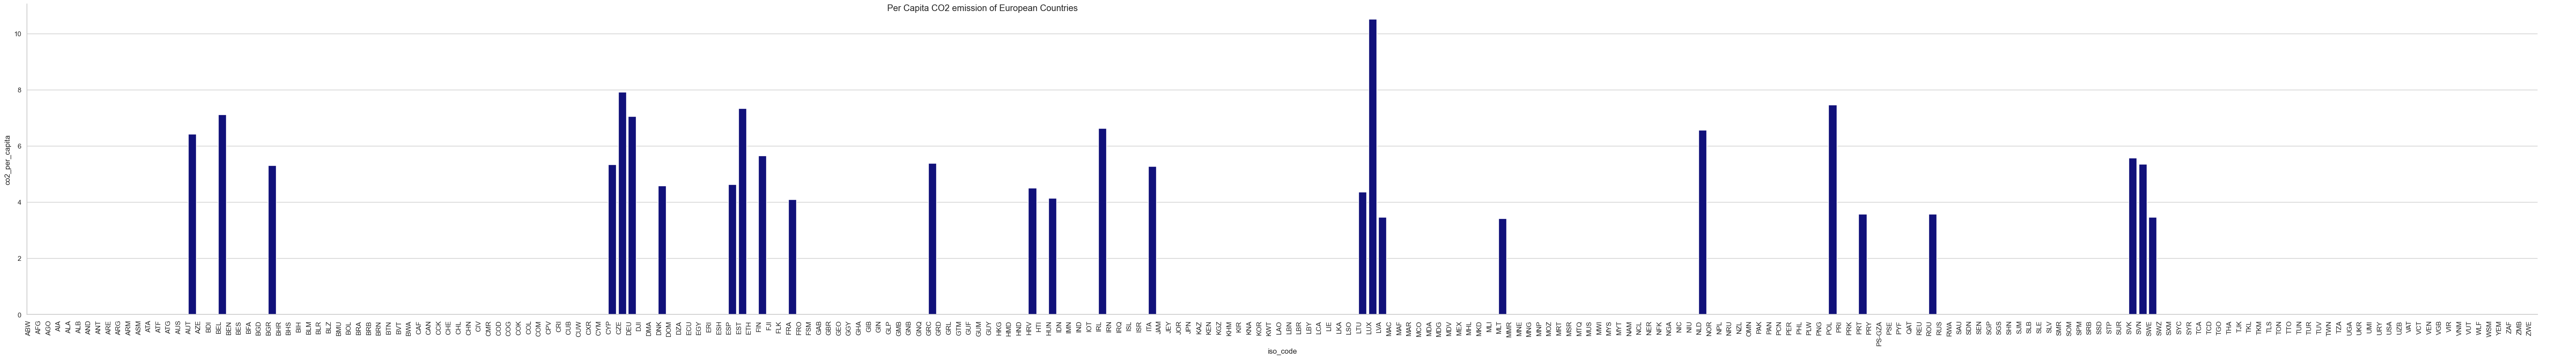

In [202]:
#Per Capita CO2 Emissions - Alphabetical Order
plot_bar(dfSortedAlpha,"iso_code", "co2_per_capita", "Per Capita CO2 emission of European Countries")

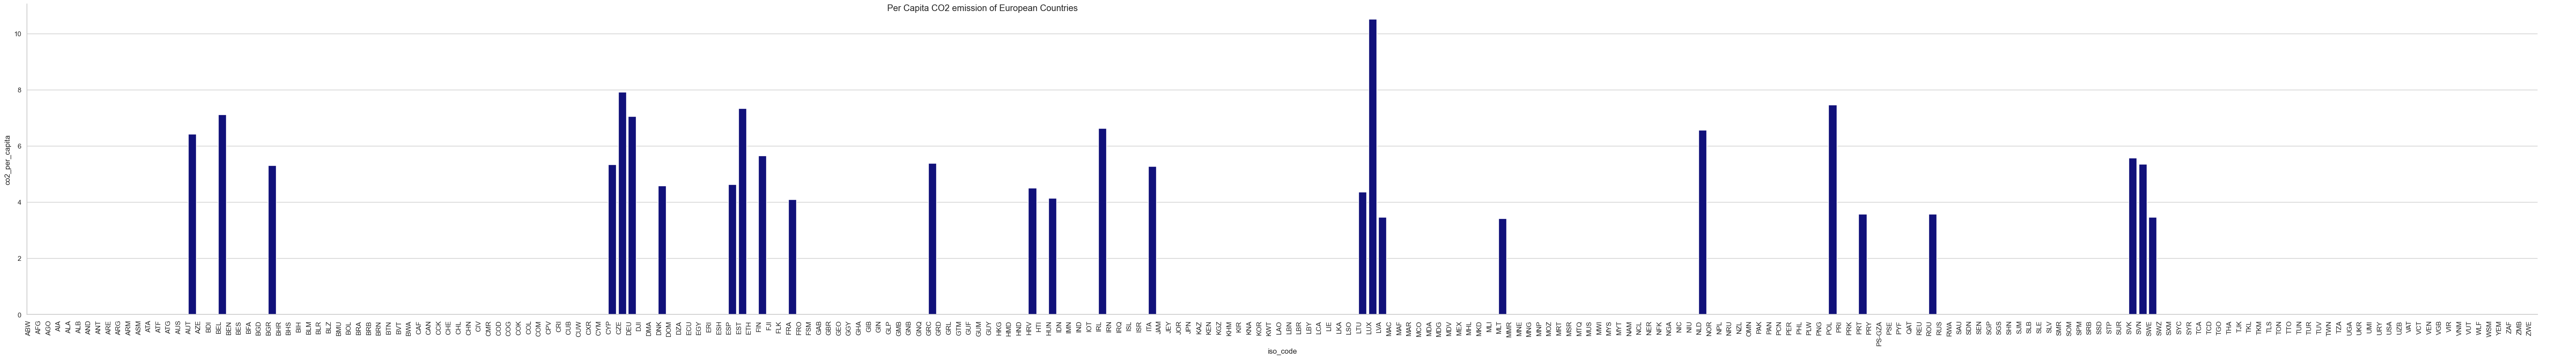

In [203]:
#Per Capita CO2 Emissions - Sorted by Per Capita Emission
plot_bar(dfSortedPerCapita, "iso_code", "co2_per_capita", "Per Capita CO2 emission of European Countries")

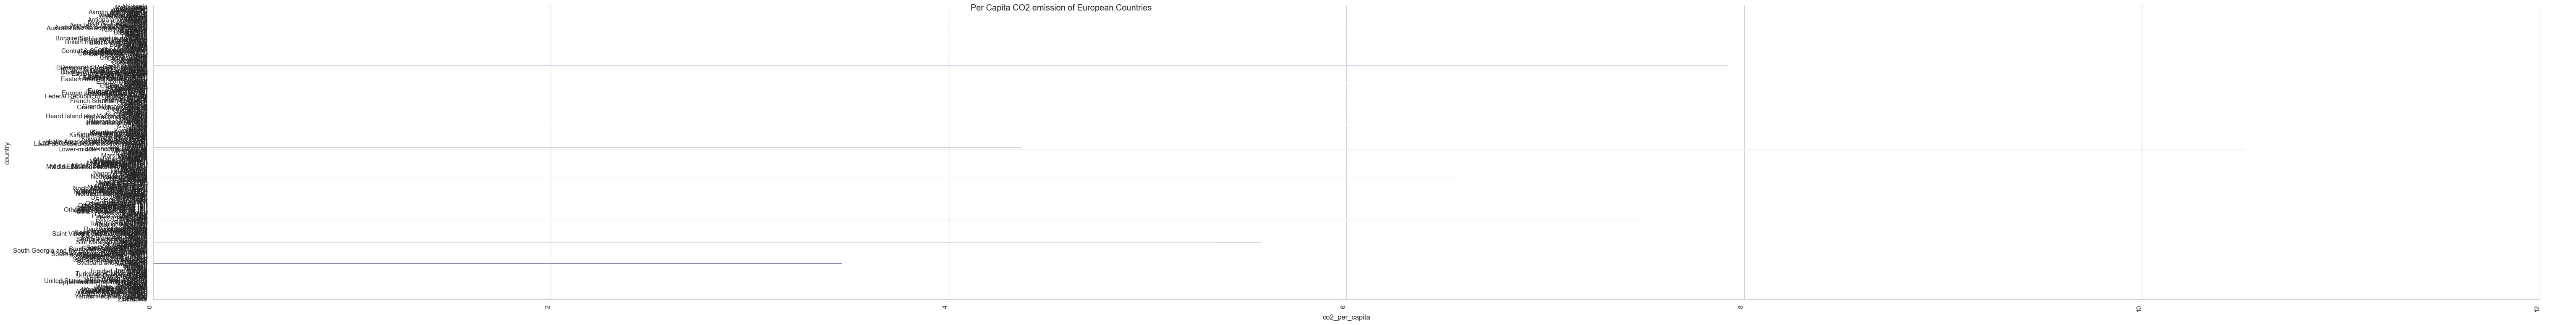

In [204]:
#Per Capita CO2 Emissions - Alphabetical Order
plot_bar(dfSortedAlpha, "co2_per_capita", "country", "Per Capita CO2 emission of European Countries")

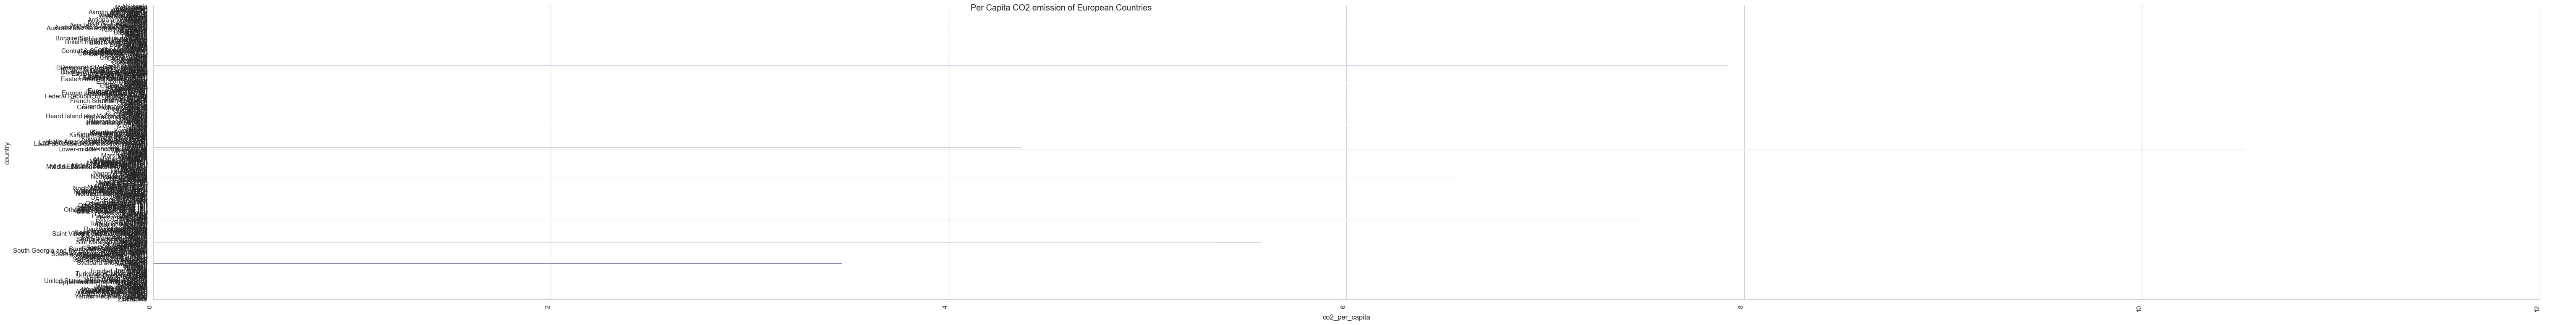

In [205]:
#Per Capita CO2 Emissions - Sorted by Per Capita Emission
plot_bar(dfSortedPerCapita, "co2_per_capita", "country", "Per Capita CO2 emission of European Countries")

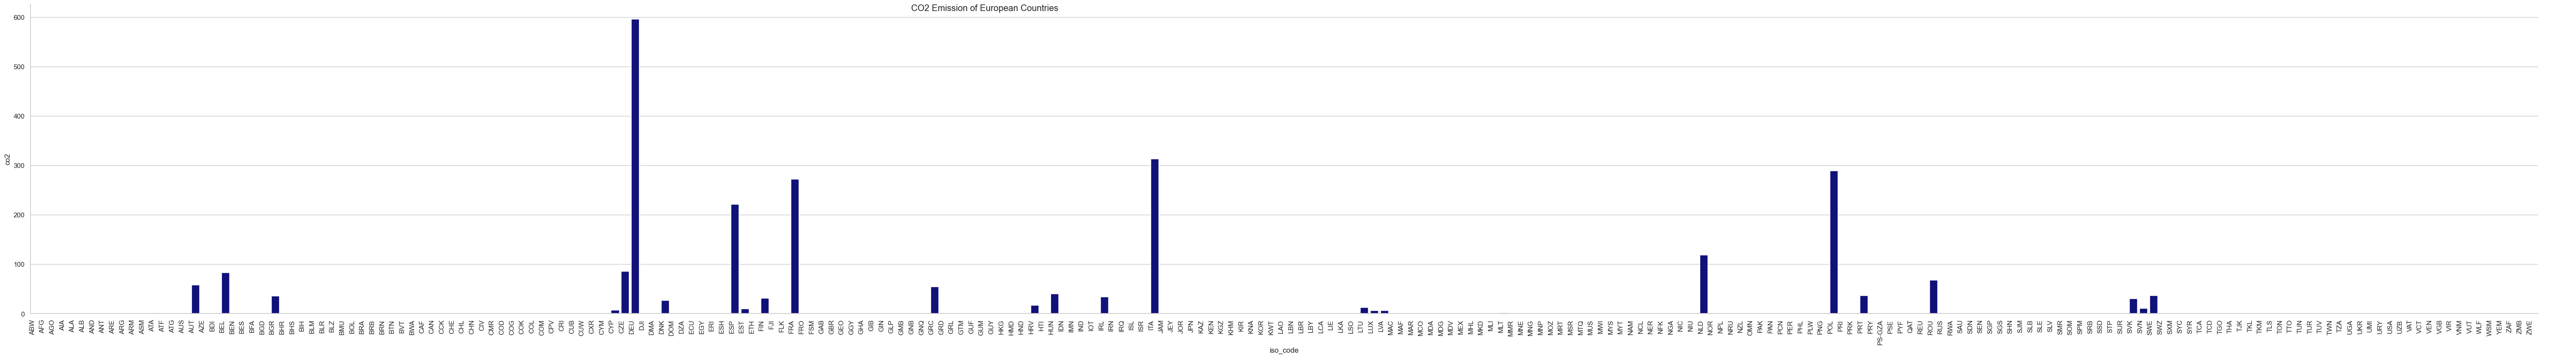

In [206]:
#Per CO2 Emissions-Sorted Per Capita
plot_bar(dfSortedPerCapita, "iso_code","co2", "CO2 Emission of European Countries")

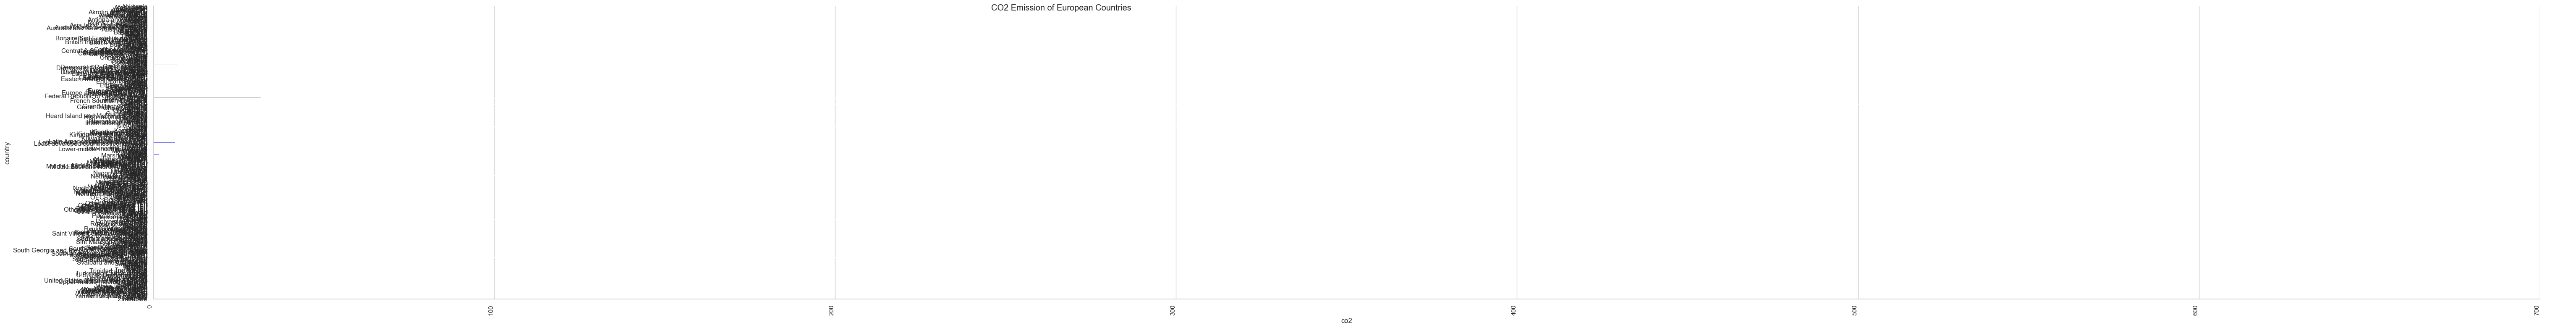

In [207]:
#Per CO2 Emissions-Sorted Per Capita
plot_bar(dfSortedPerCapita, "co2","country", "CO2 Emission of European Countries")

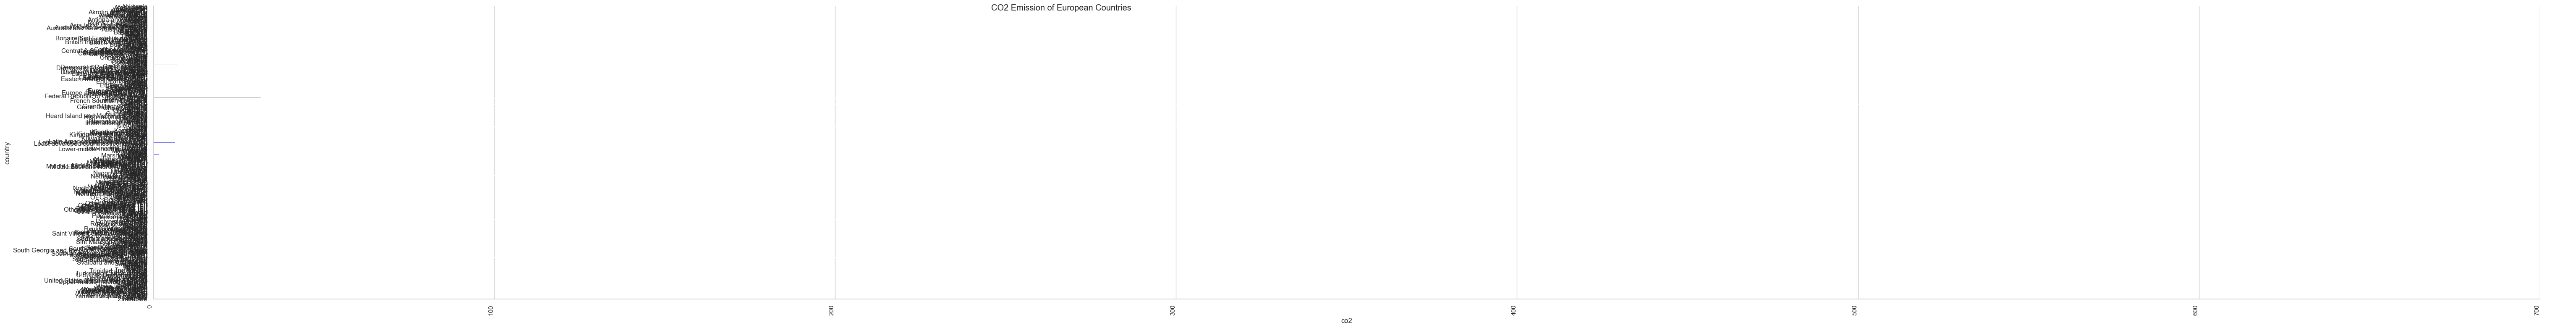

In [208]:
#Per CO2 Emissions-Sorted Alphabetical
plot_bar(dfSortedAlpha, "co2","country", "CO2 Emission of European Countries")

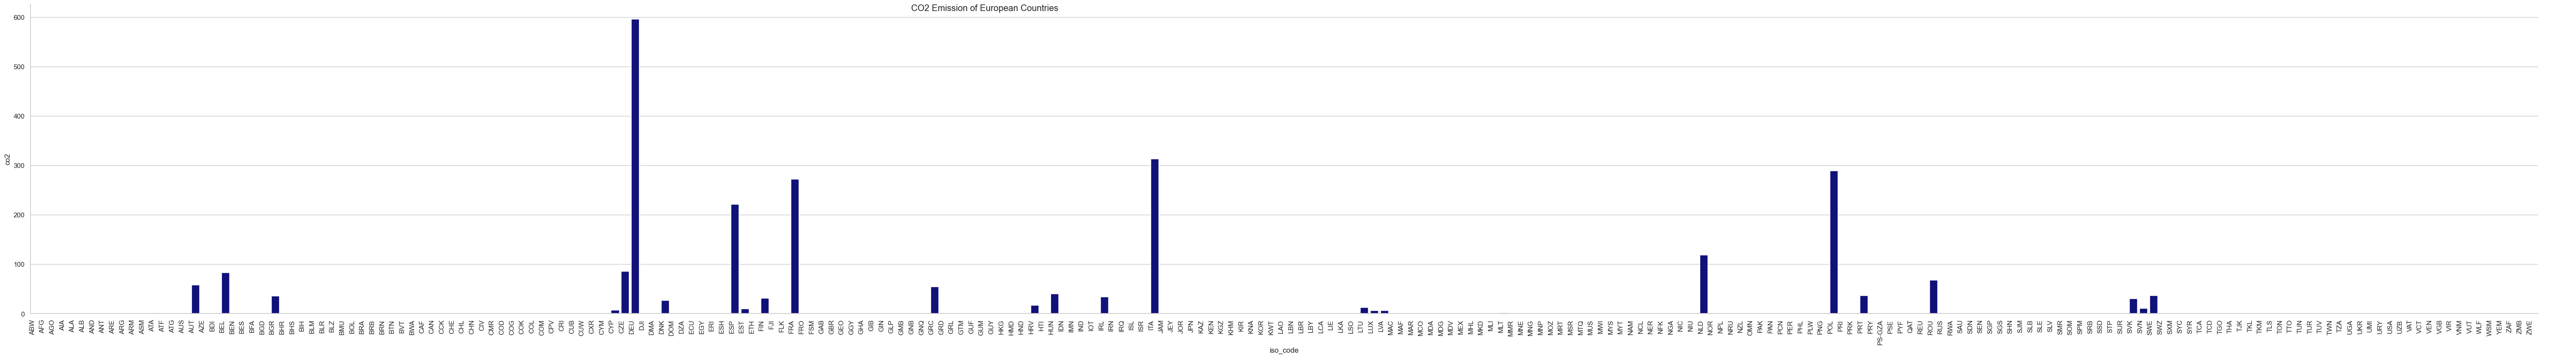

In [209]:
#Per CO2 Emissions-Sorted Alphabetical
plot_bar(dfSortedAlpha, "iso_code","co2", "CO2 Emission of European Countries")